# Classification with Logistic Regression

## Toy examples

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/
!ls

We'll start from a simple 2D dataset that cannot be separated linearly:

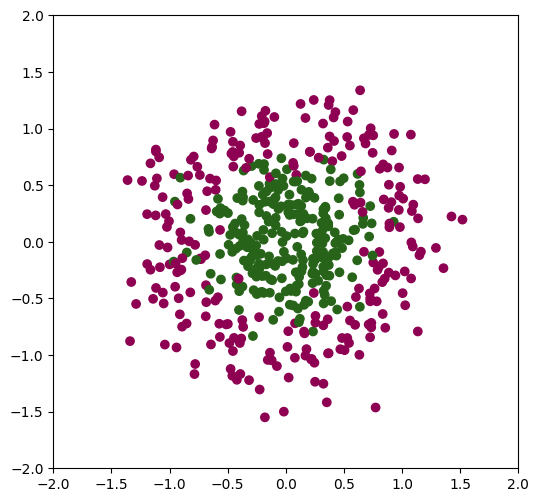

In [ ]:
X, y = make_circles(500, noise=0.2, factor=0.4)

def plot_data_and_model_decision(
    X, y,
    model=None,
    x1limits=(-2, 2),
    x2limits=(-2, 2),
    npoints=250
):
    plt.figure(figsize=(6, 6), dpi=100)
    plt.scatter(*X.T, c=y, cmap='PiYG')

    plt.xlim(*x1limits)
    plt.ylim(*x2limits)

    if model is not None:
        xx1, xx2 = np.meshgrid(
            np.linspace(*x1limits, npoints),
            np.linspace(*x2limits, npoints)
        )
        yy = model.predict(
            np.stack([xx1.ravel(), xx2.ravel()], axis=1)
        ).reshape(xx1.shape)

        plt.contourf(xx1, xx2, yy, levels=30, cmap='PiYG', alpha=0.5)

plot_data_and_model_decision(X, y)

This time we'll use the pre-implemented logistic regression model from sklearn:

In [ ]:
from sklearn.linear_model import LogisticRegression

Let's create and fit the model:

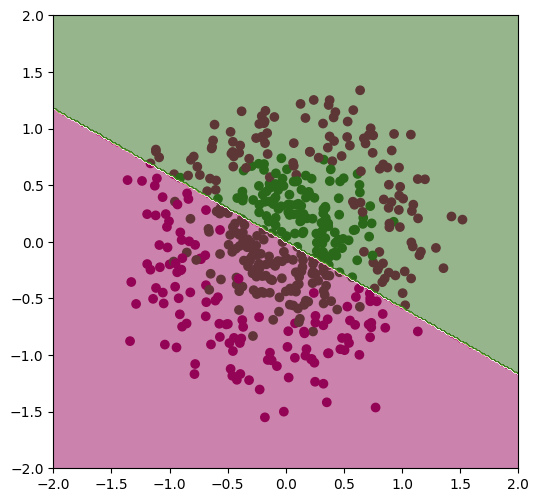

In [ ]:
model = LogisticRegression(penalty='none') # We'll discuss different penalty terms in the next lecture.
                                           # So far let's use the model without penalty.
model.fit(X, y)

plot_data_and_model_decision(X, y, model)

Ok, so obviously this model doesn't solve our problem. Let's introduce one more feature to help it:
$$x_3 = x_1^2 + x_2^2$$

Fill the gaps in the code below. The input argument `X` is the design matrix of shape `(N, 2)`, where `N` is the number of objects in the dataset. The output should be a `(N, 3)` matrix with the first two columns of the original matrix and a third column with $x_3$ defined above.

*Hint: you may want to use one of the `np.stack` or `np.concatenate` functions. You can select a single column of `X` by calling `X[:,i]`, or a range of columns `X[:,i:j]`. Alternatively you may use functions like `X.sum(axis=some_axis)`.*

In [ ]:
def expand(X):
    # SOLUTION
    return np.concatenate([X, (X**2).sum(axis=1, keepdims=True)], axis=1)

Once ready, check whether your code passes the assertions below.

In [ ]:
dummy_features = np.array([[ 0.21229302, -0.81899763],
                           [ 0.27464688,  1.06161091],
                           [-0.53345235,  0.07886241],
                           [-1.78837706,  0.7757026 ],
                           [ 0.11964808, -1.02261288],
                           [-1.51239009, -2.01744101],
                           [ 0.55670847, -0.90079509],
                           [ 0.01404381,  0.59349316],
                           [ 0.38491586, -1.98926289],
                           [-1.06521045, -0.26742879]])
np.testing.assert_almost_equal(
    expand(dummy_features),
    np.array([[ 0.21229302, -0.81899763,  0.71582544],
              [ 0.27464688,  1.06161091,  1.20244863],
              [-0.53345235,  0.07886241,  0.29079069],
              [-1.78837706,  0.7757026 ,  3.80000703],
              [ 0.11964808, -1.02261288,  1.06005277],
              [-1.51239009, -2.01744101,  6.35739201],
              [ 0.55670847, -0.90079509,  1.12135611],
              [ 0.01404381,  0.59349316,  0.35243136],
              [ 0.38491586, -1.98926289,  4.10532706],
              [-1.06521045, -0.26742879,  1.20619146]])
)

Now we'll make use of sklearn's pipelines! Pipelines allow you to stack different transformations one after another to make your model really powerful. There's a lot of ready to use transformations already implemented in sklearn. As for now, however, we'll define our own for the sake of demonstration:

In [ ]:
class MyFeaturesExpansion:
    # `fit` and `transform` are the two required methods to be able
    # to use our transformation in a sklearn pipeline

    def fit(self, X, y):
        # SOLUTION
        return self

    def transform(self, X):
        return expand(X)

In [ ]:
from sklearn.pipeline import make_pipeline

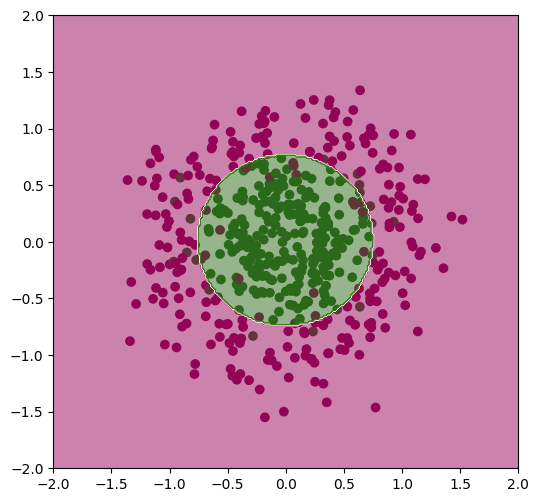

In [ ]:
model = make_pipeline(
    MyFeaturesExpansion(),
    LogisticRegression(penalty='none')
)
# A pipeline has the same interface as regular sklearn models (i.e. fit, predict, etc.)
model.fit(X, y)

plot_data_and_model_decision(X, y, model)

Great, so now the problem is solvable!

Note though that this new feature only allows us to have circular decision boundaries, which is not perfect when our data is squeezed or stretched in some direction:

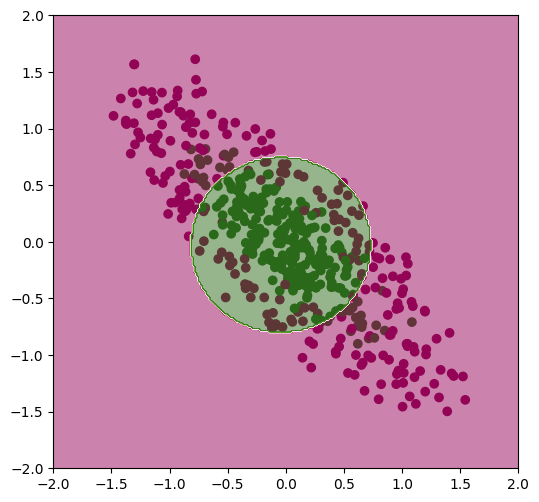

In [ ]:
X, y = make_circles(500, noise=0.2, factor=0.4)
X *= [1.5, 0.5]
X = X @ [[0.7, -0.7], [0.7, 0.7]]

model = make_pipeline(
    MyFeaturesExpansion(),
    LogisticRegression(penalty='none')
)
model.fit(X, y)

plot_data_and_model_decision(X, y, model)

In order to make the model more expressive let's use general polynomial feature expansion. That's already implemented in `sklearn.preprocessing.PolynomialFeatures`.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

Now try to make a pipeline of polynomial features expansion + logistic regression model in the code cell below:

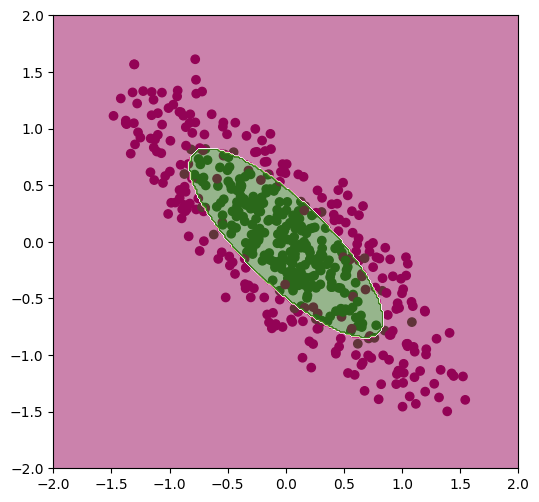

In [ ]:
model = make_pipeline(
    # SOLUTION
    PolynomialFeatures(degree=2),
    LogisticRegression(penalty='none')
)
#raise NotImplementedError()

model.fit(X, y)
plot_data_and_model_decision(X, y, model)

When ready, check that your solution beats the 90% accuracy score threshold:

In [ ]:
X, y = make_circles(500, noise=0.2, factor=0.4)
X *= [1.5, 0.5]
X = X @ [[0.7, -0.7], [0.7, 0.7]]

model.fit(X, y)

X, y = make_circles(5000, noise=0.2, factor=0.4)
X *= [1.5, 0.5]
X = X @ [[0.7, -0.7], [0.7, 0.7]]

pred = model.predict(X)

assert (pred == y).mean() > 0.9, (pred == y).mean()